<a href="https://colab.research.google.com/github/LikhanInSpace/bomFatabo/blob/main/Resnet_for_20_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# resize images 
img_size = [224,224]
train_path = '/content/drive/MyDrive/thesis dataset/test dataset/train'
valid_path = '/content/drive/MyDrive/thesis dataset/test dataset/test'

In [ ]:
#Implementing ResNet built in function within Keras
#Pretrained on ImageNet weights
res = ResNet50(include_top=False, weights= 'imagenet',input_shape= img_size+ [3])

NameError: ignored

In [ ]:
for layer in res.layers:
  layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/thesis dataset/test dataset/train/*')

In [ ]:

folders

['/content/drive/MyDrive/thesis dataset/test dataset/train/real',
 '/content/drive/MyDrive/thesis dataset/test dataset/train/fake']

In [ ]:
len(folders)

2

In [ ]:
x = Flatten()(res.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=res.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
#assigning cost/loss function and optimization
#cost/loss function: categorical_crossentropy
#optimizer: adams
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
#importing images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/thesis dataset/test dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/thesis dataset/test dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 40 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [ ]:
#fit the model
r = model.fit(
    training_set, 
    validation_data = test_set,
    epochs = 20,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

Epoch 1/20
2/2 [==============================] - 1s 415ms/step - loss: 0.6960 - accuracy: 0.7750 - val_loss: 1.1441 - val_accuracy: 0.6250
Epoch 2/20
2/2 [==============================] - 1s 301ms/step - loss: 0.3954 - accuracy: 0.8000 - val_loss: 1.8411 - val_accuracy: 0.5000
Epoch 3/20
2/2 [==============================] - 1s 312ms/step - loss: 0.9432 - accuracy: 0.5250 - val_loss: 1.1043 - val_accuracy: 0.6000
Epoch 4/20
2/2 [==============================] - 1s 665ms/step - loss: 0.4611 - accuracy: 0.8250 - val_loss: 1.0835 - val_accuracy: 0.6000
Epoch 5/20
2/2 [==============================] - 1s 665ms/step - loss: 0.6566 - accuracy: 0.6750 - val_loss: 1.4527 - val_accuracy: 0.5000
Epoch 6/20
2/2 [==============================] - 1s 306ms/step - loss: 0.6290 - accuracy: 0.6000 - val_loss: 1.0438 - val_accuracy: 0.6250
Epoch 7/20
2/2 [==============================] - 1s 664ms/step - loss: 0.4027 - accuracy: 0.7750 - val_loss: 1.0922 - val_accuracy: 0.5750
Epoch 8/20
2/2 [====

In [ ]:
import matplotlib.pyplot as plt

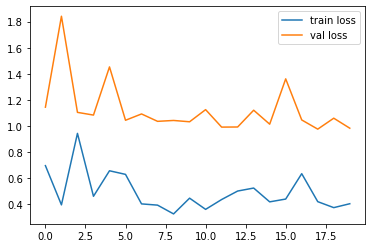

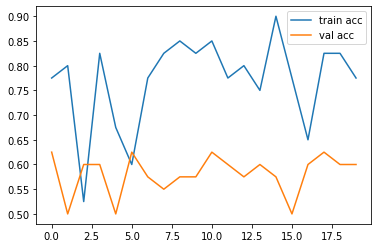

<Figure size 432x288 with 0 Axes>

In [ ]:


# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')